In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [38]:
unlabaledData = pd.read_csv("Y_25_75 _Unlabeled.csv")

In [39]:
pca = PCA(n_components=2)
reducedData = pca.fit_transform(unlabaledData)

In [40]:
kmeans = KMeans(n_clusters = 6, random_state = 69)
cluster_labels = kmeans.fit_predict(reducedData)


c:\Users\elfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


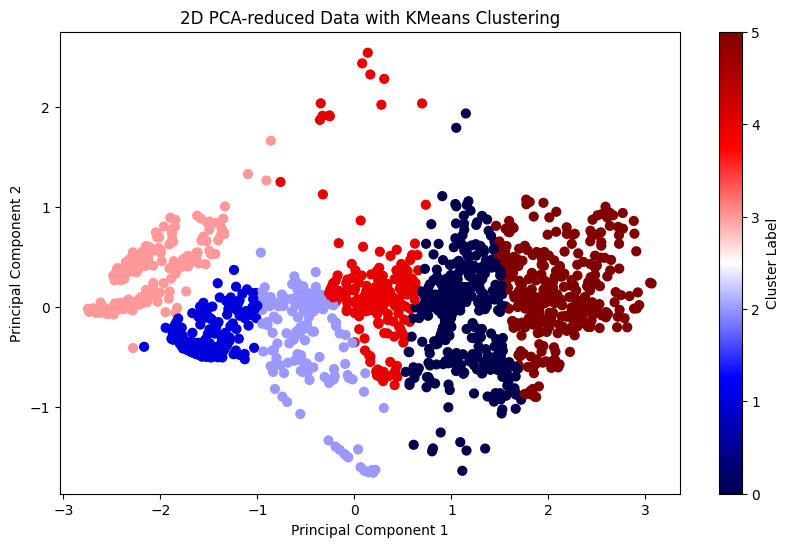

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(reducedData[:, 0], reducedData[:, 1], c=cluster_labels, cmap='seismic', marker='o',  s=40, alpha=1)
plt.title('2D PCA-reduced Data with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

plt.show()

In [42]:
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
dataset_pca = pd.DataFrame(abs(pca.components_), index = ['PC1', 'PC2'] )


print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.15].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.15].iloc[1]).dropna())

Cumulative variance explained by 2 principal components: 89.12%
As per PC 1:
 608    0.150839
609    0.157073
610    0.160651
611    0.162362
612    0.156940
613    0.150232
Name: PC1, dtype: float64


As per PC 2:
 611    0.152649
612    0.154587
Name: PC2, dtype: float64
